# Introduction to Data Science, CS 5963 / Math 3900
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/* 

## Lecture 9: Decision Trees


We continue discussing classification problems and introduce the decision tress method. In the process, we introduce the Python library [scikit-learn](http://scikit-learn.org/). But first, we'll recap some fundamental concepts in supervised learning. 

Recommended Reading: ISLR, Ch. 4 and Grus Ch. 12. 

This Lecture is in part based on [this lab](https://github.com/cs109/2015lab7/blob/master/Lab7-Botany%20and%20Ensemble%20Methods.ipynb) and [this blog](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-29.html). 

## Recap

What is supervised learning? Supervised learning is a machine learning technique that uses labeled training data to generate a model. The input is a feature vector plus a label. 

We'll be using [a dataset of Titanic passengers](https://www.kaggle.com/c/titanic/) in this lab, and we'll try to develop a model to see whether a particular passenger will survive or not. This is how [the dataset](titanic.csv) looks like:


| PassengerId | Survived | Pclass | Name                                                                               | Sex    | Age  | SibSp | Parch | Ticket             | Fare     | Cabin           | Embarked |
|-------------|----------|--------|------------------------------------------------------------------------------------|--------|------|-------|-------|--------------------|----------|-----------------|----------|
| 1           | 0        | 3      | Braund, Mr. Owen Harris                                                            | male   | 22   | 1     | 0     | A/5 21171          | 7.25     |                 | S        |
| 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                | female | 38   | 1     | 0     | PC 17599           | 71.2833  | C85             | C        |
| 3           | 1        | 3      | Heikkinen, Miss. Laina                                                             | female | 26   | 0     | 0     | STON/O2. 3101282   | 7.925    |                 | S        |
| 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)                                       | female | 35   | 1     | 0     | 113803             | 53.1     | C123            | S        |
| 5           | 0        | 3      | Allen, Mr. William Henry                                                           | male   | 35   | 0     | 0     | 373450             | 8.05     |                 | S        |


Here are the variable descriptions for the non-obvious variables:
 * **survival:** Survival (0 = No; 1 = Yes)
 * **pclass:**          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 * **sibsp:**           Number of Siblings/Spouses Aboard
 * **parch:**           Number of Parents/Children Aboard
 * **ticket:**          Ticket Number
 * **fare:**            Passenger Fare
 * **cabin:**           Cabin
 * **embarked:**        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


We're trying to decide whether a passenger with particular attributes will survive the Titanic disaster, so the **survival** flag is our label, the other columns are the **features**. 

We will **generate a model based on labeled data (hence "supervised learning"**), and ideally this model **should also work for new, similar data**. 

If a model satisfies this criterion, we say that it is **generalizable**. 

If a model has 100% accuracy on the training dataset but doesn't generalize to new data, then it isn't a very good model. We say that this model has **overfit** the data. 

The opposite of overfitting is **underfitting**, which happens when the model isn't complex enough to have good accuracy on the training dataset. 


**Cross-validation** is a general method for assessing how the results of a model (classification, regression,...) will *generalize* to an independent data set. 

In classification, cross-validation is a method for assessing how well the classification model will predict the class of points that weren't used to *train* the model. 

The idea of the method is simple: 
1. Split the dataset into two groups: the training dataset and the testing dataset. 
+ Train the model on the training dataset. 
+ Check the accuracy of the model on the testing dataset. 

In practice, you have to decide how to split the data into groups (i.e. how large the groups should be). You might also want to repeat the experiment so that the assessment doesn't depend on the way in which you split the data into groups.

## Decision Trees

Decision trees are very intuitive classification tools, consider the following tree:

![Titanic Decision Tree](titanic_tree.png)

[This tree](https://en.wikipedia.org/wiki/Decision_tree_learning) predicts the survival of passengers on the titanic.  The figures under the leaves show the probability of survival and the percentage of observations in the leaf.

The use of a decision tree is very simple, say someone gives you this tree and a new person. In order to predict whether or not the person would have died on the titanic, you ask the following questions, in order:

 * Is the person male? If no, we predict they would have survived. If yes, continue.
 * Is the person older than 9.5 years? If yes, we predict they would have died. If no, continue.
 * Did the person have more than 3 or more siblings? If yes, we predict they would have died. If no, they would have survived

The question we'll move to now is how would one build such a tree? 

There is [a very good, interactive tutorial online](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/), we'll explore this tutorial in the next couple of minutes. 

### Fitting a Decision Tree

Building a decision tree isn't really much harder than reading one, here's the essential rundown on the example of the ID3 algorithm:

 * If the data all have the same label, create a leaf node that predicts that label, and you're done.
 * If the list of attributes is empty (e.g., because you have used all already), create a leaf node that predicts the most common label.
 * Else, partition the data by each of the attributes.
 * Choose the partition with the lowest error.
 * Recursively continue on each partitioned subset using the remaining attributes.
 * Terminate when no attributes are left (see above), or when desired depth is reached.
 
So, how do you choose the partition with the lowest error? 

Let's say we're building a classification tree by considering a list of predictors. In our example above we want to be able to classify whether people have survived based on things like gender, age, the booked fare, etc. Let's call the variables $X_{i1}, X_{i2}, ..., X_{ip}$ ($i$ for passengers, $p$ for predictors). Initially, for the first split, we consider all the passengers and all the predictors. We also have an observed label $Y_i$ for each passenger. 

We first assign everyone to the same class, say $\hat{Y}_i = 1$. We can calculate the squared error $Err = \sum_i {(\hat{Y}_i - Y_i)^2}$. We want to achieve two things: pick the **best split** for the **best predictor**.

- At **each step** of the algorithm we consider a list of possible decision (or split), for example $X_{10} > 9$, i.e. age is greater than 9, or $X_{9} = female$.
- For each possible decision we recalculate the predictor for that rule, for example $\hat{Y}_i = 1$ if $X_{10} > 9$ and $0$ otherwise.
- We recalculate the error for each possible decision: $Err = \sum_i {(\hat{Y}_i - Y_i)^2}$
- We choose the decision that reduces the error by the largest amount.
- Then continue with the next step on the reduced input set.

This histogram nicely illustrates the split decision:

![Split decision](split_decision.png)

Now, one important decision is the desired depth of the tree, as this determines whether a tree is over- or underfit.

### Decision Trees with SciKit Learn

SciKit learn has [a nice decision tree implementation](http://scikit-learn.org/stable/modules/tree.html) which we'll use to learn a tree for our Titanic dataset.

In [1]:
import numpy as np
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn import preprocessing
import pandas as pd

#import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We need to do some cleanup: 
 * age has missing values, let's say wherever we have no value, we assume that the person is 120 years old (this is not necessarily a good decision)
 * we need to convert the categorical values to numerical values
 

In [3]:
titanic["Age"] = titanic["Age"].fillna(120)

def sex_to_numeric(x):
    if x=='male':
        return 0
    if x=='female':
        return 1
    else:
        return x

titanic["Sex"] = titanic["Sex"].apply(sex_to_numeric)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def embarked_to_numeric(x):
    if x=="S":
        return 0
    if x=="C":
        return 1
    if x=="Q":
        return 2
    else: 
        return 3
    
titanic["Embarked"] = titanic["Embarked"].apply(embarked_to_numeric)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,120.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


Let's work only with the numerical and categorical variables and omit passengerID, Name, Ticket and Cabin.

In [5]:
features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic = titanic[features]
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,120.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


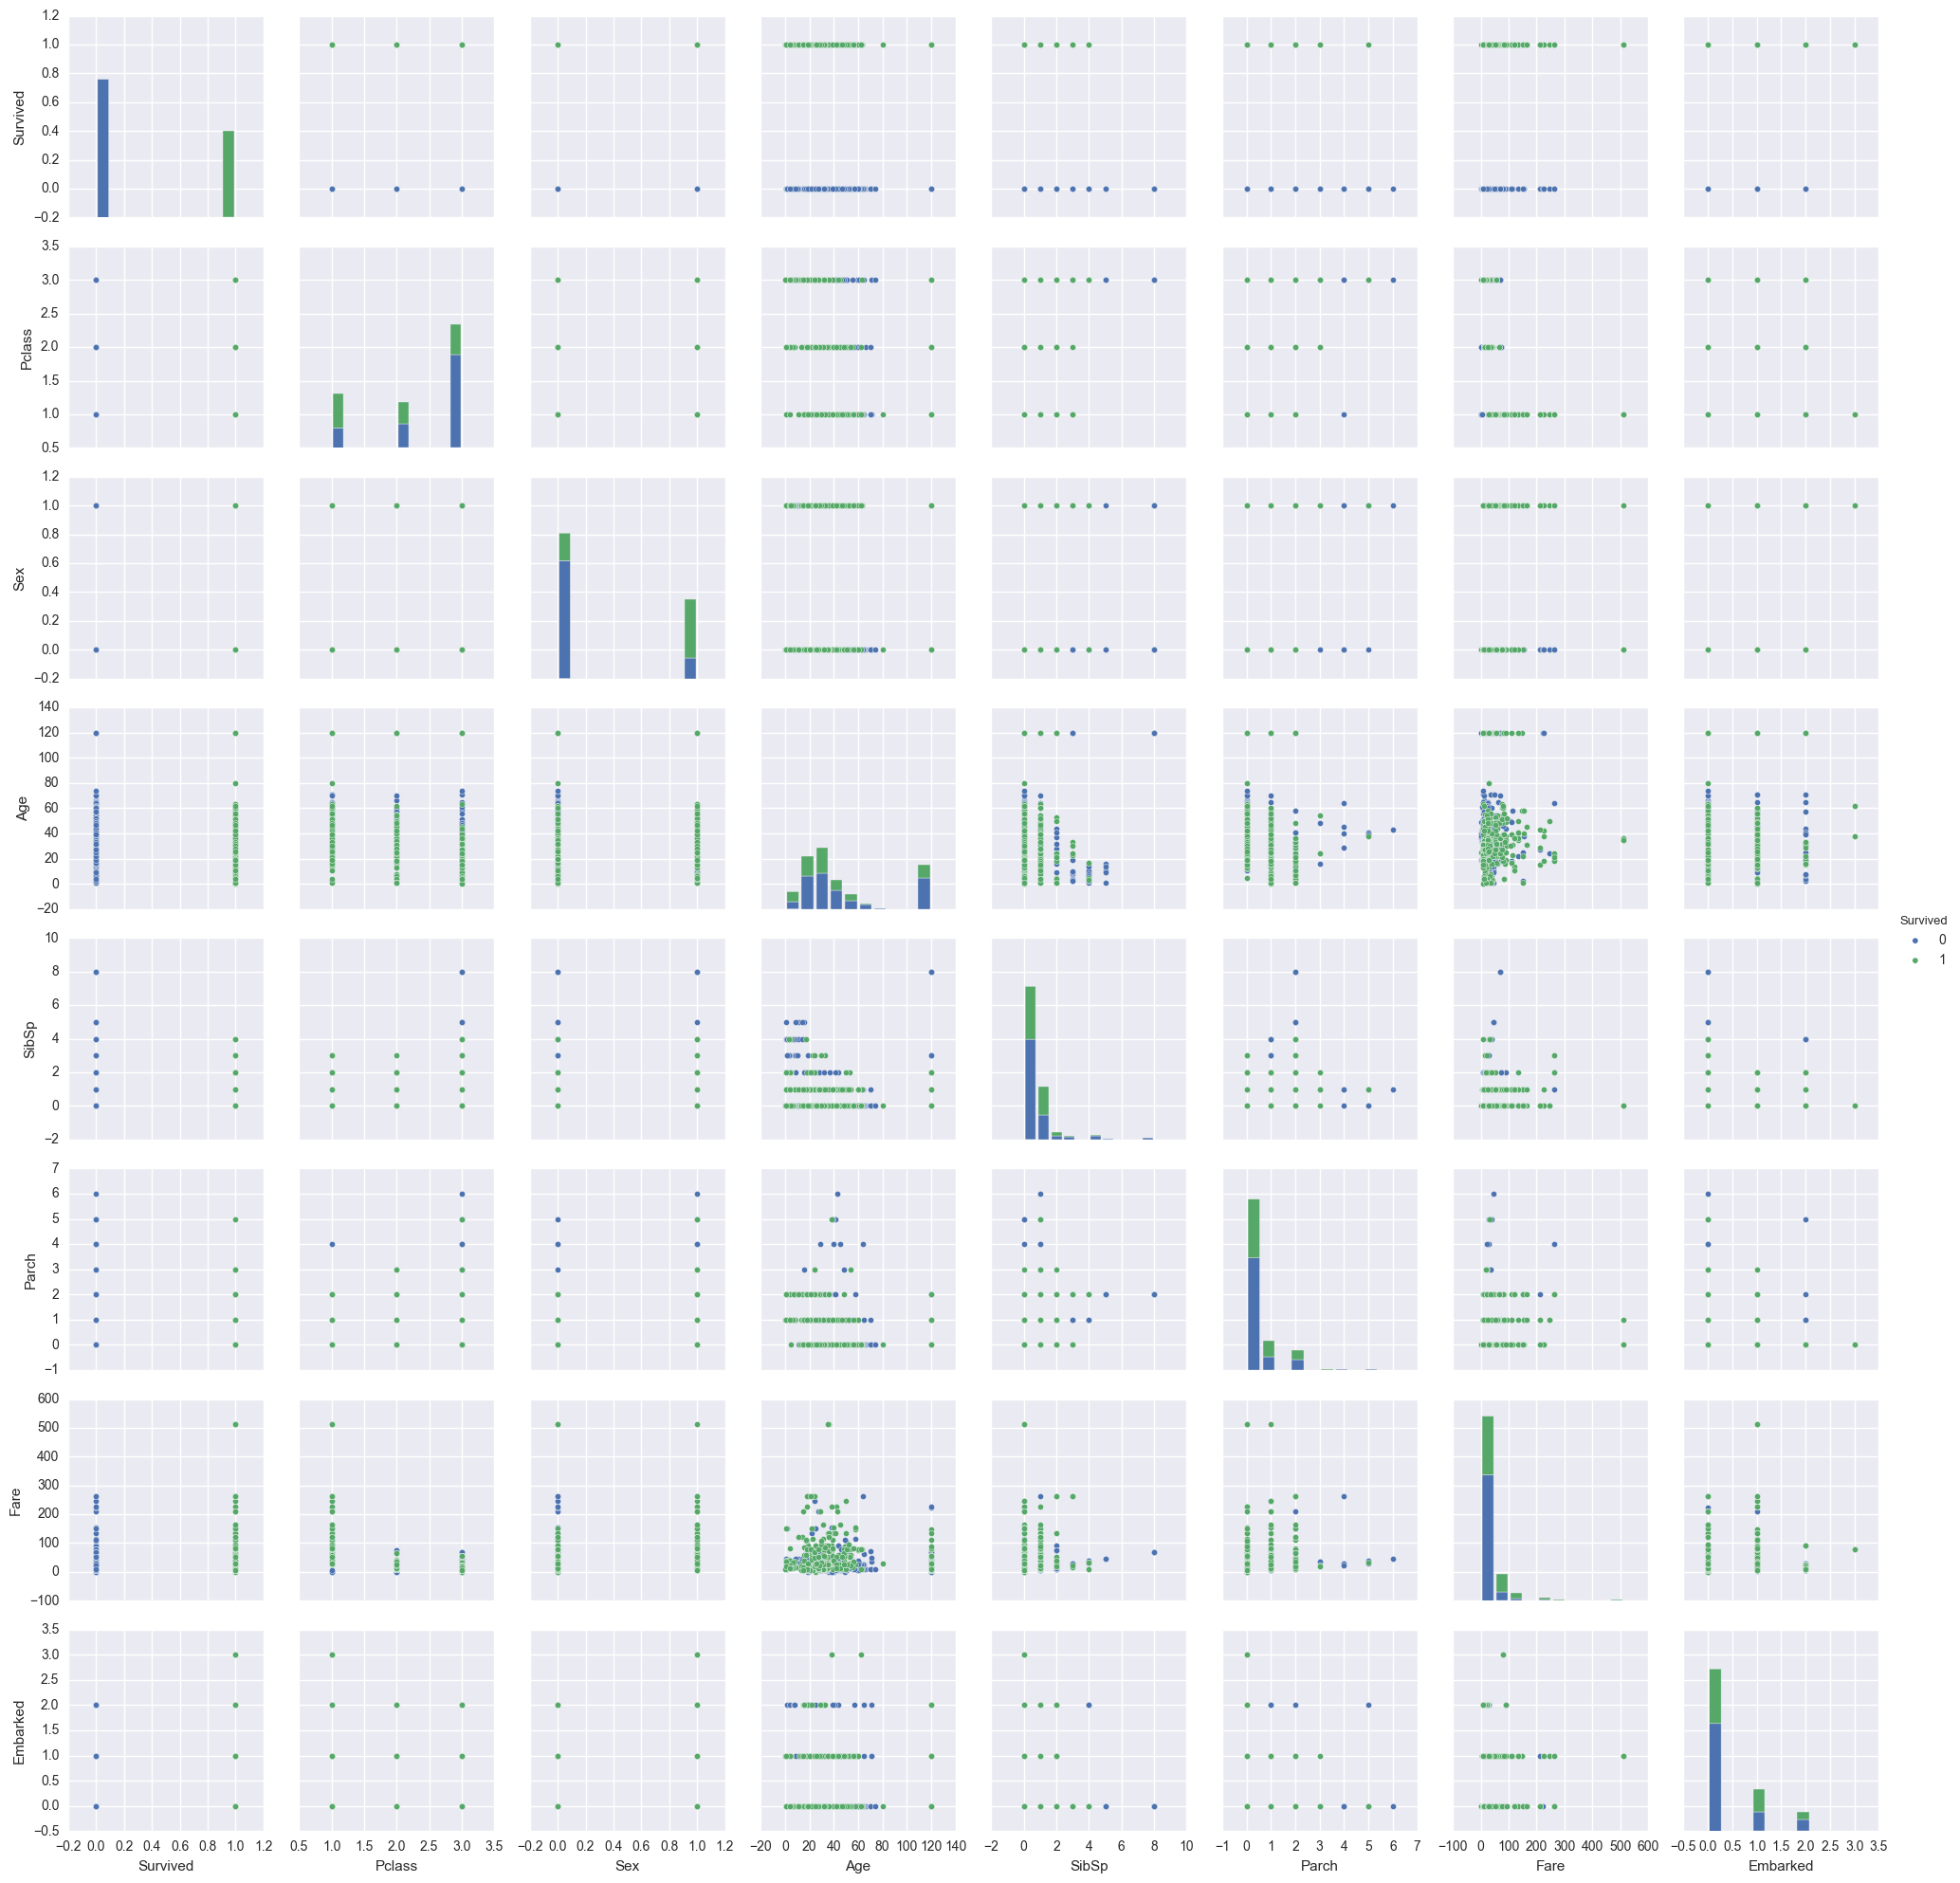

In [6]:
import seaborn as sns
sns.set()

sns.pairplot(titanic, hue="Survived")

Here is some code that splits into training and test sets and selects features.

In [7]:
#titanic_predictors = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].as_matrix()
labels =["Survived", "Perished"]

def splitData(features):
    titanic_predictors = titanic[features].as_matrix()
    titanic_labels = titanic["Survived"].as_matrix()

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(titanic_predictors, titanic_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

And more code for plotting decision trees:

In [47]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, out_file=f, feature_names=features)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    #print(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "tete.png"
    graph.write_png(image_name)  
    #i = misc.imread(image_name)
    #plt.imshow(i)
    display(Image(filename=image_name))

Now let's look at a decision tree that **ONLY operates on sex**! 

Accuracy on training data=  0.811235955056
Accuracy on test data=  0.762331838565


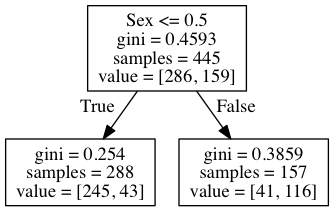

In [48]:
decisionTree = tree.DecisionTreeClassifier()

XTrain, XTest, yTrain, yTest = splitData(["Sex"])
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, ["Sex"])

That's not bad - sex seems to be a very good indicator of whether someone has survived or not. 

Let's try to add a couple of features:

Accuracy on training data=  0.833707865169
Accuracy on test data=  0.760089686099


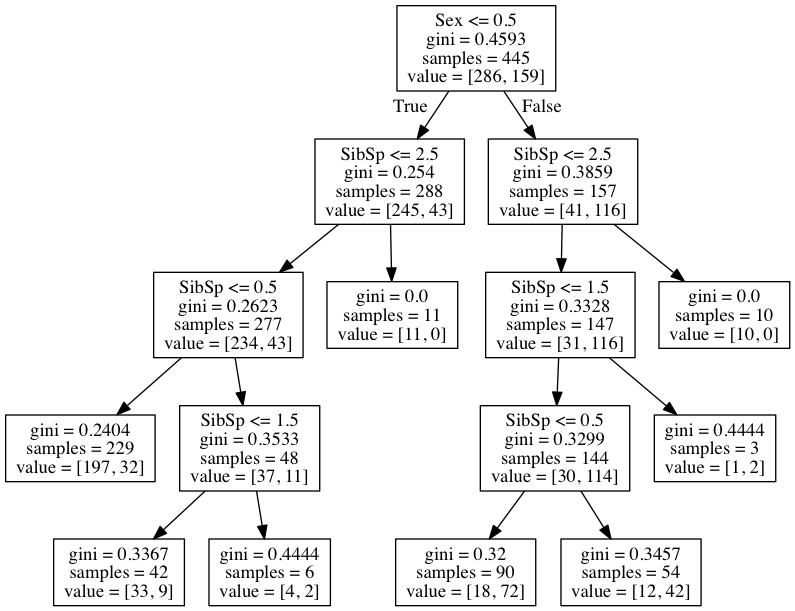

In [54]:
used_features = ["Sex", "SibSp"]
XTrain, XTest, yTrain, yTest = splitData(used_features)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, used_features)

Our accuracy on the training data has gone up, but the accuracy on the test data has gone down. It looks like we're overfitting. But maybe we just selected the wrong features? Let's just try all of them! 

Accuracy on training data=  0.988764044944
Accuracy on test data=  0.77130044843


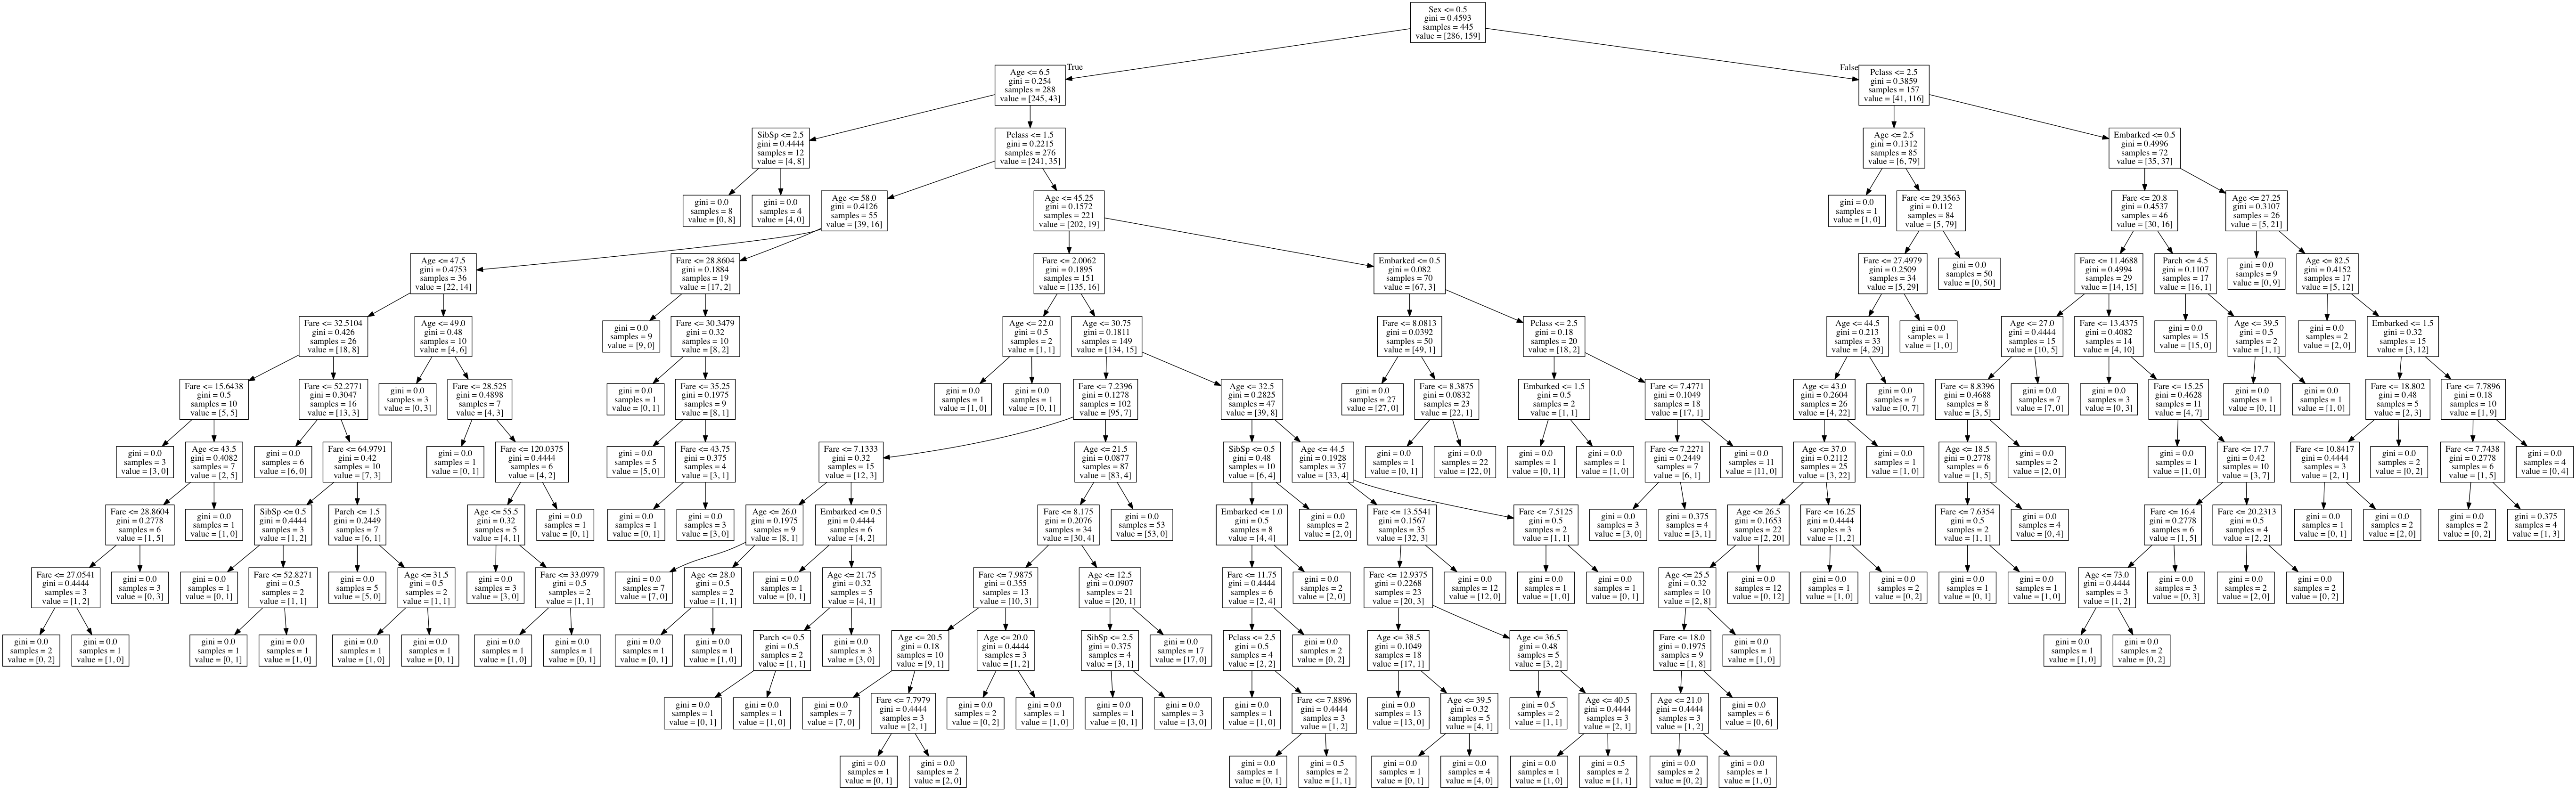

In [50]:
all_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

XTrain, XTest, yTrain, yTest = splitData(all_features)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, all_features)

OK, clearly, we're overfitting the data - 98% accuracy on the training data and only 76% on the test data. 

Decision trees are notorious for overfitting the data. There are two parameters that help us reign in overfitting:

* **max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split:** The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

Let's try combinations of depth and min split size:


Accuracy on training data=  0.862921348315
Accuracy on test data=  0.793721973094


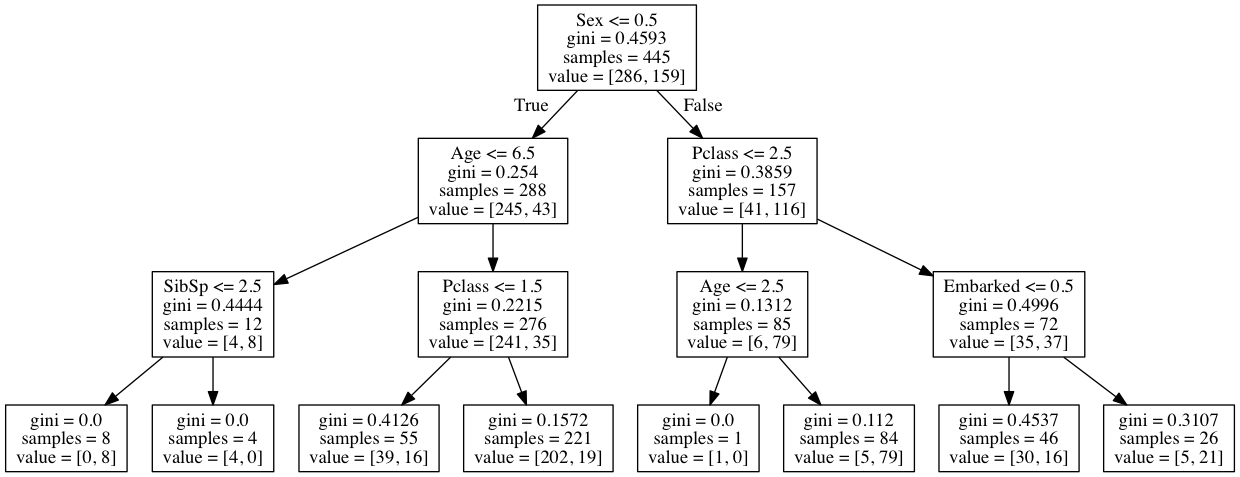

In [51]:
decisionTree = tree.DecisionTreeClassifier(max_depth=3)

decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, all_features)

Accuracy on training data=  0.916853932584
Accuracy on test data=  0.80269058296


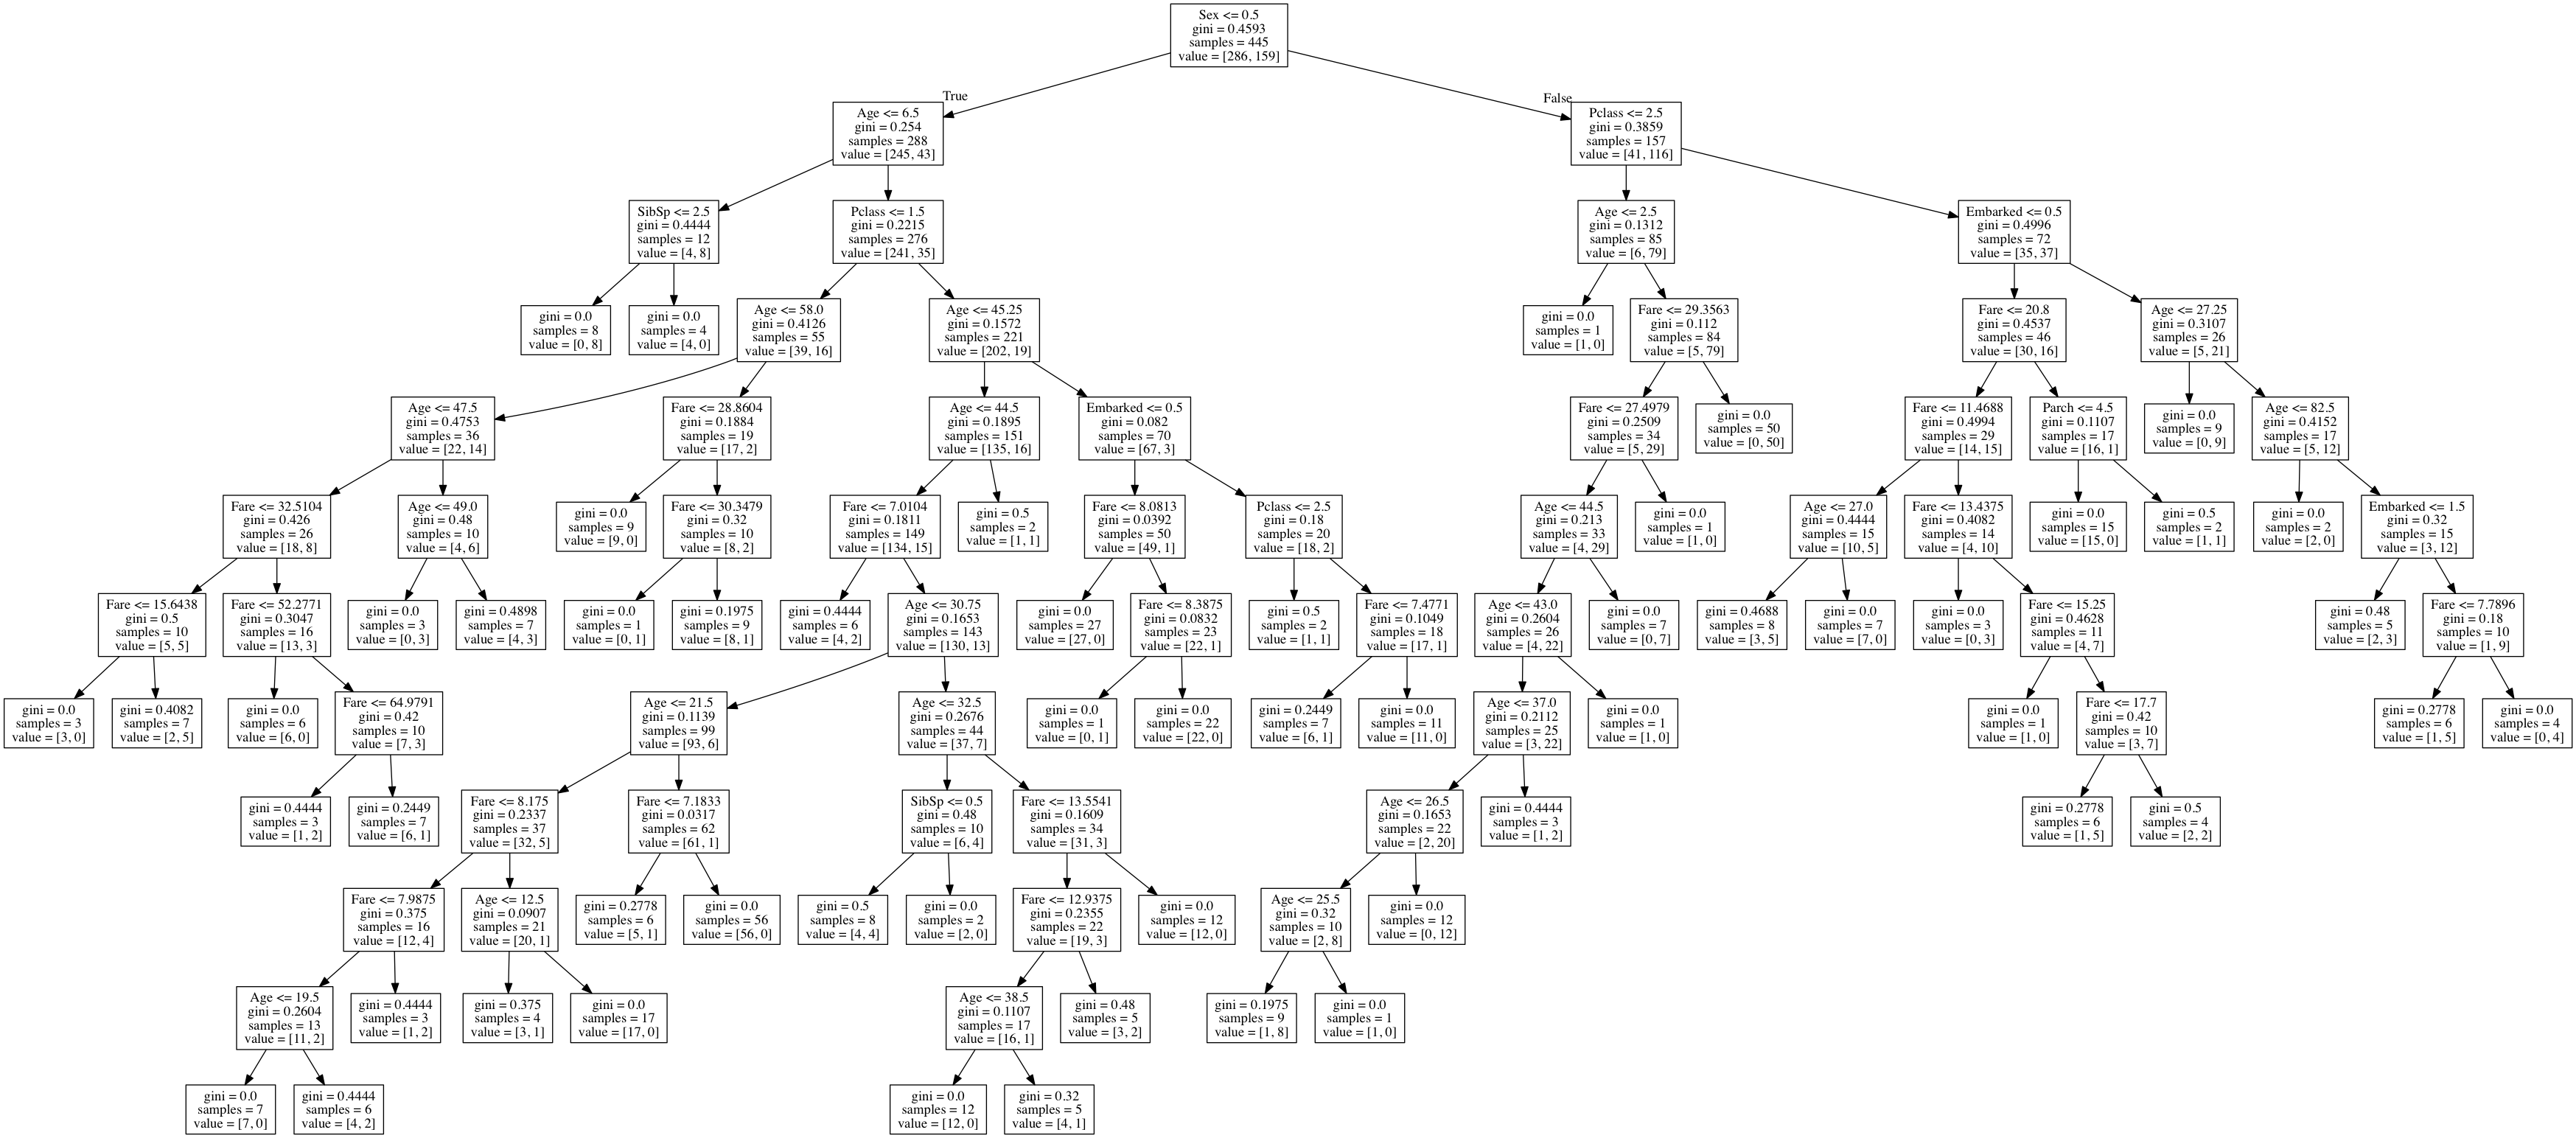

In [52]:
decisionTree = tree.DecisionTreeClassifier(min_samples_split=10)

decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, all_features)

Accuracy on training data=  0.862921348315
Accuracy on test data=  0.793721973094


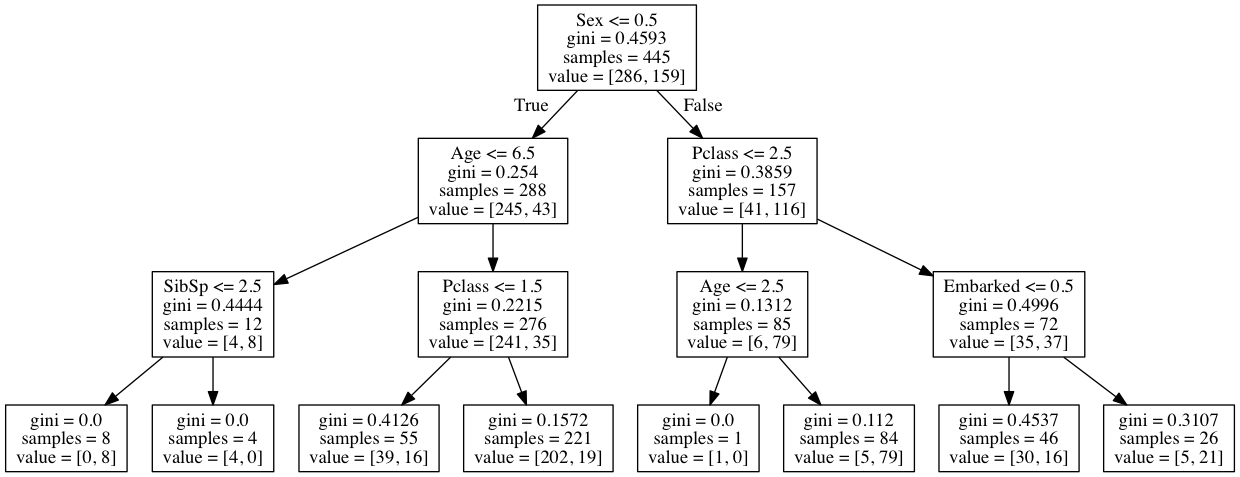

In [53]:
decisionTree = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=10)

decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, all_features)

It looks like both, the minimum number of samples for splitting and the maximum depth help with overfitting and we achieve a 79-80% accuracy rate. That doesn't sound much better than just gender alone, but 4% improvement is a lot in classification.